### 

#### 数据加载

In [1]:
import csv
from tqdm import tqdm

pos_cnt, neg_cnt = 0,0
ds_comments, labels = [],[]

with open('DMSC.csv') as f:
    reader = csv.DictReader(f) 
    for item in tqdm(reader):
        ds_comment = item['Comment']
        Star = int(item['Star'])
        if Star in [1, 2, 4, 5] and 15 <= len(ds_comment) <= 150:
            ds_comments.append(ds_comment)
            labels.append(1 if Star <= 2 else 0 if Star >=4 else -1)  # 1 正样本 0 负样本  

len(ds_comments)

2125056it [00:09, 230803.19it/s]


1125540

#### 分析评论长度，考虑截取过长，过短评论

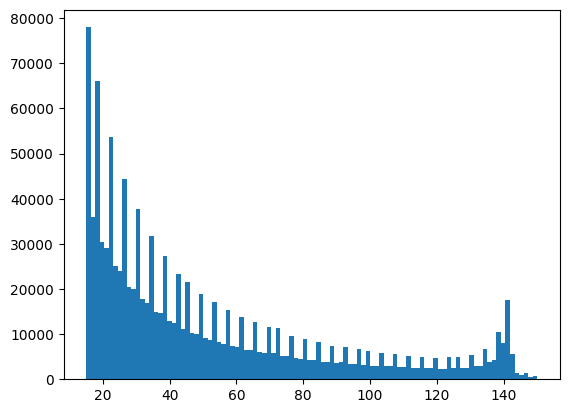

In [2]:
import matplotlib.pyplot as plt

comments_len = [len(c) for c in ds_comments]
plt.hist(comments_len, bins=100)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

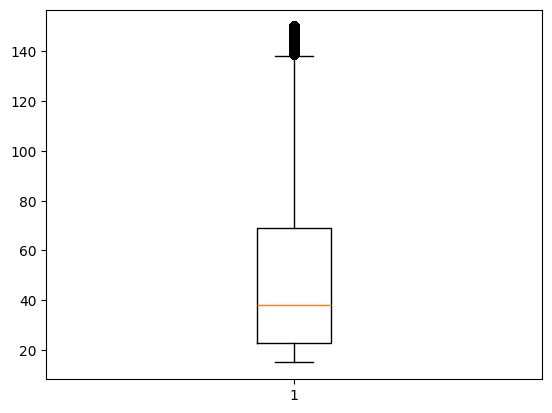

In [3]:
plt.boxplot(comments_len)
plt.show

In [4]:
# 筛选无关标点符号、格式控制符号
ds_comments = [c.replace('。',' ').replace('，',' ')  for c in ds_comments]

In [7]:
# jieba 分词
import jieba
ds_comments_jieba = [' '.join(jieba.cut(comment)) for comment in ds_comments]

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/p2/1gz8kxnn1fzfxp0jm2f0jr5c0000gn/T/jieba.cache
Loading model cost 0.841 seconds.
Prefix dict has been built successfully.


In [8]:
ds_comments_jieba[:10]

['  非常 失望   剧本 完全 敷衍了事   主线 剧情 没 突破 大家 可以 理解   可 所有 的 人物 都 缺乏 动机   正邪 之间 、 妇联 内部 都 没什么 火花   团结 - 分裂 - 团结 的 三段式 虽然 老套 但 其实 也 可以 利用 积攒 下来 的 形象 魅力 搞 出 意思   但 剧本 写得 非常 肤浅 、 平面   场面 上 调度 混乱 呆板   满屏 的 铁甲 审美疲劳   只有 笑 点算 得 上 差强人意  ',
 '  2015 年度 最 失望 作品   以为 面面俱到   实则 画蛇添足 ； 以为 主题深刻   实则 老调重弹 ； 以为 推陈出新   实则 俗不可耐 ； 以为 场面 很 high   实则 high 劲 不足   气 ！ 上 一集 的 趣味 全无   这集 的 笑 点 明显 刻意 到 心虚   全片 没有 任何 片段 给 我 有 紧张 激动 的 时候   太弱 了   跟 奥创 一样  ',
 '  《 铁人 2 》 中 勾引 钢铁 侠   《 妇联 1 》 中 勾引 鹰眼   《 美队 2 》 中 勾引 美国 队长   在 《 妇联 2 》 中 终于 … … 跟 绿巨人 表白 了   黑寡妇 用 实际行动 告诉 了 我们 什么 叫 忠贞不二 ； 而且 为了 治疗 不孕 不育 连 作战 武器 都 变成 了 两支 验孕 棒 ( 坚决 相信 快银 没有 死   后面 还 得 回来 )',
 '  虽然 从头 打到 尾   但是 真的 很 无聊 啊  ',
 '  只有 一颗 彩蛋 必须 降一星   外加 漫威 的 编剧 是 有心无力 了 吧   复仇者 联盟 只能 永远 着手 与 团队 的 和 与 不 和   这种 东西 重复 到 第二次 就是 隔 了 三年   还是 心有余而力不足 吧   只好 来 三个 新 成员   但是 认真 地   有 必要 加 一条 家庭 线 么 ？ 妇联 以后 也 是 要 走 赛车 帮 的   we   are   familly   路线 ？ ？ ？',
 '  “ 一个 没有 黑暗面 的 人 不 值得 信任   ”   第二部 剥去 冗长 的 铺垫   开场 即 高潮 、 一直 到 结束   会 有人 觉得 只 剩 动作 特技   不过 我 还 蛮 吃 这 一套   联盟 阵营 “ 

In [5]:
# sentencepiec 分词
import sentencepiece as spm
sp = spm.SentencePieceProcessor()

with open('ds_comments.txt', 'w', encoding='utf-8') as f:
    for cmt in ds_comments:
        f.write(cmt + '\n')

# 分词模型训练
spm.SentencePieceTrainer.Train(
    input='ds_comments.txt', model_prefix='ds_spm_model', vocab_size=5000,)

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: ds_comments.txt
  input_format: 
  model_prefix: ds_spm_model
  model_type: UNIGRAM
  vocab_size: 5000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0


In [ ]:
# 读取分词模型
sp.Load('ds_spm_model.model')
# 分词
ds_comments_spm = []
for c in ds_comments:
    cmt_spm = sp.EncodeAsPieces(c)
    ds_comments_spm.append(' '.join(cmt_spm))

In [10]:
ds_comments_spm[:10]

['▁ 非常 失望 ▁ 剧 本 完全 敷 衍 了 事 ▁ 主 线 剧情 没 突 破 大家 可以 理 解 ▁ 可 所有 的 人物 都 缺 乏 动 机 ▁ 正 邪 之 间 、 妇 联 内 部 都 没 什么 火 花 ▁ 团 结 - 分 裂 - 团 结 的 三 段 式 虽 然 老 套 但 其实 也 可以 利 用 积 攒 下 来 的 形 象 魅 力 搞 出 意 思 ▁但 剧 本 写 得 非常 肤 浅 、 平 面 ▁ 场面 上 调 度 混 乱 呆 板 ▁ 满 屏 的 铁 甲 审 美 疲 劳 ▁ 只有 笑点 算 得 上 差 强 人 意',
 '▁ 2 0 1 5 年 度 最 失望 作品 ▁ 以为 面 面 俱 到 ▁ 实 则 画 蛇 添 足 ; 以为 主 题 深 刻 ▁ 实 则 老 调 重 弹 ; 以为 推 陈 出 新 ▁ 实 则 俗 不 可 耐 ; 以为 场面 很 h i g h ▁ 实 则 h i g h 劲 不 足 ▁ 气 ! 上 一 集 的 趣 味 全 无 ▁这 集 的 笑点 明 显 刻 意 到 心 虚 ▁ 全 片 没有 任 何 片 段 给 我 有 紧 张 激 动 的时候 ▁ 太 弱 了 ▁ 跟 奥 创 一样',
 '▁ 《 铁 人 2 》 中 勾 引 钢 铁 侠 ▁ 《 妇 联 1 》 中 勾 引 鹰 眼 ▁ 《 美 队 2 》 中 勾 引 美 国 队 长 ▁ 在 《 妇 联 2 》 中 终于 ...... 跟 绿 巨 人 表 白 了 ▁ 黑 寡 妇 用 实 际 行 动 告 诉 了 我们 什么 叫 忠 贞 不 二 ; 而 且 为了 治 疗 不 孕 不 育 连 作 战 武 器 都 变 成 了 两 支 验 孕 棒 ( 坚 决 相 信 快 银 没有 死 ▁ 后 面 还 得 回 来 )',
 '▁虽然 从 头 打 到 尾 ▁但是 真的 很 无 聊 啊',
 '▁ 只有 一 颗 彩 蛋 必 须 降 一星 ▁ 外 加 漫 威 的 编 剧 是 有 心 无 力 了 吧 ▁ 复 仇 者 联 盟 只能 永 远 着 手 与 团 队 的 和 与 不 和 ▁ 这种 东西 重 复 到 第 二 次 就是 隔 了 三 年 ▁ 还是 心 有 余 而 力 不 足 吧 ▁ 只 好 来 三 个 新 成 员 ▁但是 认 真 地 ▁有 必 要 加 一 条 家 庭 线 么 ? 妇 联 以 后 也是 要 走 赛 车 帮

In [11]:
import pickle

with open('ds_comments_jieba.bin', 'wb') as f:
    pickle.dump((ds_comments_jieba, labels), f)

with open('ds_comments_spm.bin', 'wb') as f:
    pickle.dump((ds_comments_spm, labels), f)

print('语料处理保存完成！')


语料处理保存完成！
